https://colab.research.google.com/drive/14ErGDpYtqkoCYwGyxGPR92Wrgzwn4Fi4?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import string

In [2]:
import nltk
#nltk.download('punkt')
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.tokenize import word_tokenize
#import spacy
import sklearn
from spellchecker import SpellChecker

#import stanza #stanford pt-br 

In [3]:
corpus = pd.read_excel('./ep1_esic2023_clareza_TRAIN.xlsx')
corpus

resp_text clarity
0       Prezado Sr Jose Taunai  Em atenção ao seu pe...      c5
1      "A pedido do Pró-Reitor de Graduação, informa...      c5
2      "Prezado (a) Sr. (a), Agradecemos o contato e...    c234
3      "Prezado (a) Sr. (a), Agradecemos o contato e...    c234
4      "Prezado Prof. Gilberto Tadeu Reis da Silva  ...    c234
...                                                 ...     ...
5995   Trata-se de solicitação com base na Lei de Ac...      c1
5996   Trata-se de uma solicitação repetida. As info...      c5
5997                                           Unidade:      c5
5998   Vale dizer que a gestão dos Telefones de Uso ...    c234
5999   WILHAN DONIZETE GONçALVES NUNES, neste NUP 23...    c234

[6000 rows x 2 columns]

## Descricao

In [4]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   resp_text  6000 non-null   object
 1   clarity    6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


In [5]:
print('is there Null?')
print(corpus.isnull().sum())

is there Null?
resp_text    0
clarity      0
dtype: int64


In [6]:
corpus.groupby('clarity').describe()

resp_text                                                            \
            count unique                                                top   
clarity                                                                       
c1           2000   1839   Prezado(a) Senhor(a),  Sua manifestação foi a...   
c234         2000   1929   Prezado(a) Senhor(a),  Sua manifestação foi a...   
c5           2000   1911   Prezado (a) Senhor (a)     1. Em atenção ao p...   

              
        freq  
clarity       
c1        24  
c234      17  
c5         8

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

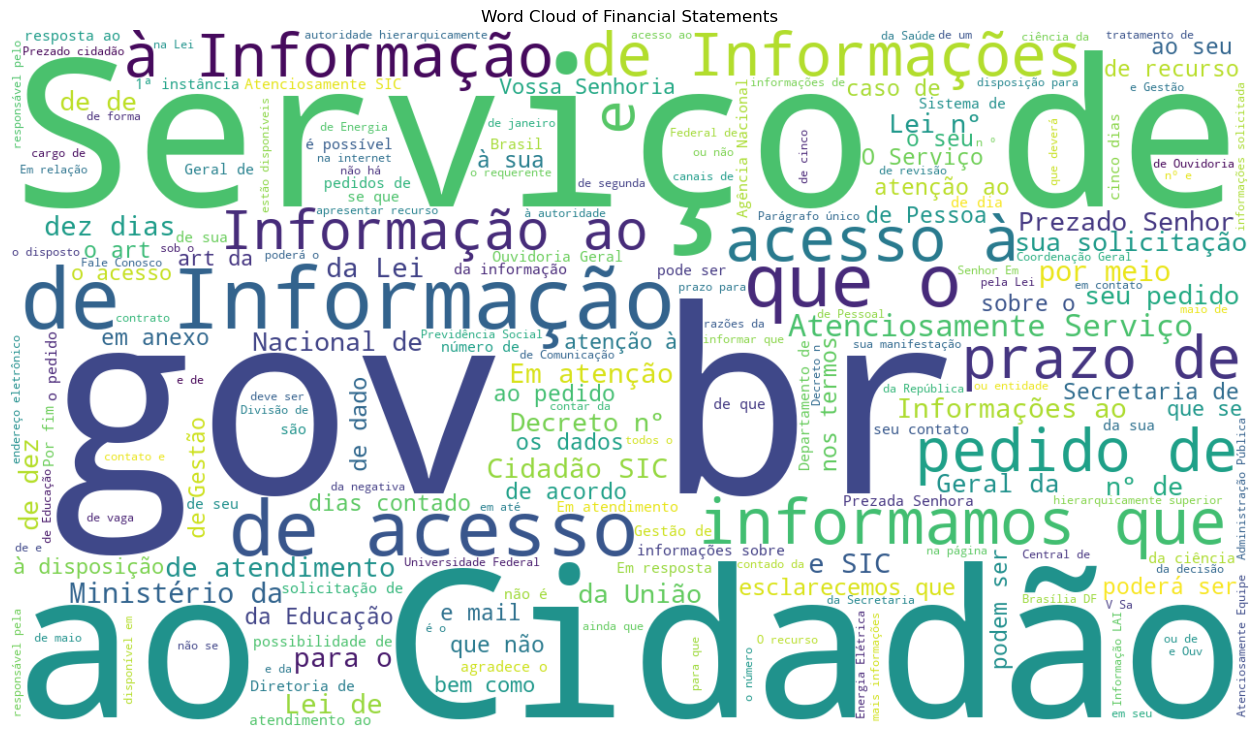

In [8]:
text = ' '.join(corpus['resp_text'])
wordcloud = WordCloud(width=1280, height=720, background_color='white').generate(text)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Financial Statements')
plt.show()

## Pre-processing

### Texts

In [9]:
l_unique = sorted(corpus['clarity'].unique())
label_map = {x: i for i, x in enumerate(l_unique)} 
label_map

{'c1': 0, 'c234': 1, 'c5': 2}

In [10]:
corpus['Class'] = corpus['clarity'].map(label_map)

In [11]:
texts = corpus['resp_text']
texts = texts.str.lower()
texts = texts.str.translate(str.maketrans('', '', string.punctuation))
texts = texts.str.replace('[\d+]', '') #remove numeros
#textos = txtos.str.replace(None, '')


In [12]:
# spell = SpellChecker()

In [13]:
# tokens_textos = []
# for text in texts:
#     tokens_textos.append(nltk.word_tokenize(text))

In [14]:
# corrected = []

# for text in tokens_textos:
#     temp = []

#     for word in text:
#         temp.append(spell.correction(word))

#     corrected.append(temp)



In [15]:
# for text in corrected:
#     text = [word for word in text if word is not None]
#     corrected.append(TreebankWordDetokenizer().detokenize(text))

In [16]:
corpus['textAdj1'] = texts

#### Corpus2

In [17]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer

stop_words = set(stopwords.words('portuguese'))
tokenizer = TreebankWordTokenizer()
lemmatizer = WordNetLemmatizer()

In [18]:
aux = corpus['textAdj1'].copy()
aux = [tokenizer.tokenize(txt) for txt in aux]
print(aux[0])

['prezado', 'sr', 'jose', 'taunai', 'em', 'atenção', 'ao', 'seu', 'pedido', 'de', 'acesso', 'à', 'informação', 'registrado', 'em', '26012016', 'encaminhamos', 'arquivo', 'anexo', 'com', 'a', 'resposta', 'elaborada', 'pela', 'unidade', 'competente', 'deste', 'ministério', 'registrese', 'que', 'no', 'caso', 'de', 'negativa', 'de', 'acesso', 'à', 'informação', 'ou', 'de', 'não', 'fornecimento', 'das', 'razões', 'da', 'negativa', 'do', 'acesso', 'poderá', 'o', 'requerente', 'apresentar', 'recurso', 'no', 'prazo', 'de', 'dez', 'dias', 'contado', 'da', 'ciência', 'da', 'decisão', 'à', 'autoridade', 'hierarquicamente', 'superior', 'à', 'que', 'adotou', 'a', 'decisão', 'que', 'deverá', 'apreciálo', 'no', 'prazo', 'de', 'cinco', 'dias', 'contado', 'da', 'sua', 'apresentação', 'atenciosamente', 'serviço', 'de', 'informação', 'ao', 'cidadão', 'mj', '61', '20253949', '3358']


In [19]:
#corpus['textAdj2'] = [lemmatizer.lemmatize(token) for token in corpus['textAdj2']]
print(stop_words)

{'à', 'se', 'somos', 'até', 'éramos', 'tínhamos', 'forem', 'houver', 'por', 'tivéramos', 'o', 'sua', 'tivessem', 'as', 'elas', 'formos', 'houvéssemos', 'tenho', 'das', 'hão', 'delas', 'estivessem', 'temos', 'não', 'uma', 'essas', 'fôssemos', 'minha', 'terá', 'teu', 'qual', 'estavam', 'lhes', 'deles', 'houve', 'tuas', 'foram', 'dele', 'houvesse', 'havemos', 'que', 'estejamos', 'tivéssemos', 'houverei', 'fui', 'como', 'para', 'estes', 'está', 'houvéramos', 'teriam', 'tivermos', 'tu', 'aquilo', 'fora', 'da', 'e', 'também', 'suas', 'houveríamos', 'na', 'lhe', 'isto', 'nos', 'do', 'tém', 'sejam', 'aquelas', 'ela', 'houverem', 'no', 'teremos', 'ou', 'eles', 'tiveram', 'eu', 'tua', 'quem', 'tenham', 'houveria', 'dos', 'haja', 'nem', 'ser', 'estamos', 'estávamos', 'aos', 'fôramos', 'esta', 'mais', 'mas', 'foi', 'me', 'seriam', 'sem', 'depois', 'isso', 'houvessem', 'estivéramos', 'seríamos', 'só', 'nosso', 'estivéssemos', 'tiverem', 'estão', 'estivesse', 'fosse', 'seremos', 'for', 'estivera', '

In [20]:
temp = []
for txt in aux:
    txt = [token for token in txt if not token in stop_words]
    temp.append(txt)
    

In [21]:
corpus['textAdj2'] = temp
corpus

resp_text clarity  Class  \
0       Prezado Sr Jose Taunai  Em atenção ao seu pe...      c5      2   
1      "A pedido do Pró-Reitor de Graduação, informa...      c5      2   
2      "Prezado (a) Sr. (a), Agradecemos o contato e...    c234      1   
3      "Prezado (a) Sr. (a), Agradecemos o contato e...    c234      1   
4      "Prezado Prof. Gilberto Tadeu Reis da Silva  ...    c234      1   
...                                                 ...     ...    ...   
5995   Trata-se de solicitação com base na Lei de Ac...      c1      0   
5996   Trata-se de uma solicitação repetida. As info...      c5      2   
5997                                           Unidade:      c5      2   
5998   Vale dizer que a gestão dos Telefones de Uso ...    c234      1   
5999   WILHAN DONIZETE GONçALVES NUNES, neste NUP 23...    c234      1   

                                               textAdj1  \
0       prezado sr jose taunai  em atenção ao seu pe...   
1      a pedido do próreitor de graduação informamos...   
2      prezado a sr a agradecemos o contato e inform...   
3      prezado a sr a agradecemos o contato e inform...   
4      prezado prof gilberto tadeu reis da silva  em...   
...                                                 ...   
5995   tratase de solicitação com base na lei de ace...   
5996   tratase de uma solicitação repetida as inform...   
5997                                            unidade   
5998   vale dizer que a gestão dos telefones de uso ...   
5999   wilhan donizete gonçalves nunes neste nup 234...   

                                               textAdj2  
0     [prezado, sr, jose, taunai, atenção, pedido, a...  
1     [pedido, próreitor, graduação, informamos, ufs...  
2     [prezado, sr, agradecemos, contato, informamos...  
3     [prezado, sr, agradecemos, contato, informamos...  
4     [prezado, prof, gilberto, tadeu, reis, silva, ...  
...                                                 ...  
5995  [tratase, solicitação, base, lei, acesso, info...  
5996  [tratase, solicitação, repetida, informações, ...  
5997                                          [unidade]  
5998  [vale, dizer, gestão, telefones, uso, público,...  
5999  [wilhan, donizete, gonçalves, nunes, neste, nu...  

[6000 rows x 5 columns]

In [22]:
#nltk.download('wordnet')

In [23]:
import spacy

#!python3 -m spacy download pt_core_news_sm
nlp = spacy.load('pt_core_news_sm')

In [24]:
temp = []
for txt in corpus['textAdj2'] :
    txt = str(txt)
    txt = nlp(txt)
    txt = [token.lemma_ for token in txt if not token.is_punct]
    txt = " ".join(txt)
    temp.append(txt) 
   


In [25]:
corpus['textAdj2'] = temp
corpus

resp_text clarity  Class  \
0       Prezado Sr Jose Taunai  Em atenção ao seu pe...      c5      2   
1      "A pedido do Pró-Reitor de Graduação, informa...      c5      2   
2      "Prezado (a) Sr. (a), Agradecemos o contato e...    c234      1   
3      "Prezado (a) Sr. (a), Agradecemos o contato e...    c234      1   
4      "Prezado Prof. Gilberto Tadeu Reis da Silva  ...    c234      1   
...                                                 ...     ...    ...   
5995   Trata-se de solicitação com base na Lei de Ac...      c1      0   
5996   Trata-se de uma solicitação repetida. As info...      c5      2   
5997                                           Unidade:      c5      2   
5998   Vale dizer que a gestão dos Telefones de Uso ...    c234      1   
5999   WILHAN DONIZETE GONçALVES NUNES, neste NUP 23...    c234      1   

                                               textAdj1  \
0       prezado sr jose taunai  em atenção ao seu pe...   
1      a pedido do próreitor de graduação informamos...   
2      prezado a sr a agradecemos o contato e inform...   
3      prezado a sr a agradecemos o contato e inform...   
4      prezado prof gilberto tadeu reis da silva  em...   
...                                                 ...   
5995   tratase de solicitação com base na lei de ace...   
5996   tratase de uma solicitação repetida as inform...   
5997                                            unidade   
5998   vale dizer que a gestão dos telefones de uso ...   
5999   wilhan donizete gonçalves nunes neste nup 234...   

                                               textAdj2  
0     prezar sr jose taunai atenção pedir acesso inf...  
1     pedir próreitor graduação informamo ufsc convi...  
2     prezar sr agradecer contato informamo endereço...  
3     prezar sr agradecer contato informamo estabele...  
4     prezar prof gilberto tader rei Silva atendimen...  
...                                                 ...  
5995  tratase solicitação base lei acesso informação...  
5996  tratase solicitação repetir informação request...  
5997                                            unidade  
5998  vale dizer gestão telefone uso público fazer e...  
5999  wilhan donizete gonçalve nune em este nup 2348...  

[6000 rows x 5 columns]

### Class

In [26]:
l_unique = sorted(corpus['clarity'].unique())
label_map = {x: i for i, x in enumerate(l_unique)} 
label_map

{'c1': 0, 'c234': 1, 'c5': 2}

In [27]:
corpus['Class'] = corpus['clarity'].map(label_map)

In [28]:
corpus.dtypes

resp_text    object
clarity      object
Class         int64
textAdj1     object
textAdj2     object
dtype: object

### Corpus Analysis 

[(Source link)](https://www.kaggle.com/code/hainescity/financial-sentiment-n-gram-logistic-regressor)

In [29]:
import re

In [30]:
def get_all_string(sentences): 
    sentence = ''
    for words in sentences:
        sentence += words
    #sentence = re.sub('[^A-Za-z0-9 ]+', '', sentence) #remove tudo o que não eh alfabeto
    sentence = re.sub(r'http\S+', '', sentence) #remove os links
    #print(f"Sentences -> {sentence}")
    return sentence 


def preprocess(series):
    all_string = get_all_string(series)
    #print(f"preprocess all_str {all_string}")
    all_string = nltk.RegexpTokenizer(r'\w+').tokenize(all_string)
    print(f"preprocess all_str tokens {all_string}")
    return all_string

In [31]:
import plotly.express as px

In [32]:
def create_freq_df(cleaned_tokens): 
    fdist = nltk.FreqDist(cleaned_tokens)
    freq_df = pd.DataFrame.from_dict(fdist, orient='index')
    freq_df.columns = ['Frequency']
    freq_df.index.name = 'Term'
    freq_df = freq_df.sort_values(by=['Frequency'], ascending=False)
    freq_df = freq_df.reset_index()
    return freq_df

def plot_text_distribution(x_df, y_df, color, title, xaxis_text, yaxis_text):
    
    fig = px.bar(x=x_df, 
                y=y_df,
                color=y_df,
                text=y_df,
                color_continuous_scale=color)

    fig.update_layout(
        title_text=title,
        template='plotly_white',
        xaxis=dict(
            title=xaxis_text,
        ),
        yaxis=dict(
            title=yaxis_text,
        )
    )

    fig.update_traces(marker_line_color='black', 
                    marker_line_width=1.5, 
                    opacity=0.8)
    
    fig.show()

def create_wordcloud(freq_df, title, color):
    
    data = freq_df.set_index('Term').to_dict()['Frequency']
    
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=800, 
               height=400, 
               max_words=100,
               colormap= color,
               max_font_size=200,
               min_font_size = 1 ,
               random_state=8888, 
               background_color='white').generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()


In [33]:
CltGroup = preprocess(corpus.loc[corpus['clarity'] == 'c1']['textAdj2'])
df = create_freq_df(CltGroup)
TopWords = df[:10]

plot_text_distribution(TopWords['Term'], TopWords['Frequency'],
                  'blues', 'Top 10 Palavras recorrentes c1', 'Text', 'Number of Texts')

preprocess all_str tokens ['prezar', 'sr', 'luis', 'cesar', 'lopes', 'zeredo', 'atenção', 'solicitação', 'apresentar', 'junto', 'sicbb', 'sob', 'protocolo', 'nº', '9901000383201948', 'esclarecemo', 'informação', 'ora', 'solicitar', 'responder', 'meio', 'protocolo', 'nº', '99901000266201984', 'marlo', 'valeriano', 'Borges', 'gerente', 'executivoprezadoa', 'sra', 'agradecer', 'contato', 'informamo', 'agência', 'nacional', 'vigilância', 'sanitária', 'x96', 'anvisa', 'possuir', 'endereço', 'eletrônico', 'wwwanvisagovbr', 'onde', 'sra', 'poder', 'buscar', 'informação', 'relação', 'registro', 'produto', 'origem', 'animal', 'importar', 'informamo', 'registro', 'produto', 'estabelecimento', 'estrangeiro', 'previamente', 'habilitar', 'exportar', 'Brasil', 'dever', 'realizar', 'diretamente', 'através', 'sistema', 'pgasigsif', 'Ministério', 'agricultura', 'pecuária', 'abastecimento', 'orientação', 'acesso', 'uso', 'sistema', 'constar', 'sitio', 'eletrônico', 'mapa', 'link', 'atenciosamente', 'Div

In [34]:
CltGroup = preprocess(corpus.loc[corpus['clarity'] == 'c5']['textAdj2'])
df = create_freq_df(CltGroup)
TopWords = df[:10]

plot_text_distribution(TopWords['Term'], TopWords['Frequency'],
                  'blues', 'Top 10 Palavras recorrentes c5', 'Text', 'Number of Texts')
#create_wordcloud(df, 'c5 Distribution', 'Blues')

preprocess all_str tokens ['prezar', 'sr', 'jose', 'taunai', 'atenção', 'pedir', 'acesso', 'informação', 'registrar', '26012016', 'encaminhamos', 'arquivo', 'anexo', 'resposta', 'elaborar', 'unidade', 'competente', 'de', 'este', 'Ministério', 'registreser', 'caso', 'negativo', 'acesso', 'informação', 'fornecimento', 'razão', 'negativo', 'acesso', 'poder', 'requerente', 'apresentar', 'recurso', 'prazo', 'dez', 'dia', 'contar', 'ciência', 'decisão', 'autoridade', 'hierarquicamente', 'superior', 'adotar', 'decisão', 'dever', 'apreciálo', 'prazo', 'cinco', 'dia', 'contar', 'apresentação', 'atenciosamente', 'serviço', 'informação', 'cidadão', 'mj', '61', '20253949', '3358pedir', 'próreitor', 'graduação', 'informamo', 'ufsc', 'convite', 'mec', 'aderir', 'plataforma', 'bori', 'março', '2017', 'plataforma', 'carolina', 'bori', 'sistema', 'informatizar', 'criar', 'Ministério', 'educação', 'sesu', 'capes', 'gestão', 'controle', 'processo', 'revalidação', 'reconhecimento', 'diploma', 'estrangeiro

In [60]:
CltGroup = preprocess(corpus.loc[corpus['clarity'] == 'c234']['textAdj2'])
df = create_freq_df(CltGroup)
TopWords = df[:10]

plot_text_distribution(TopWords['Term'], TopWords['Frequency'],
                  'blues', 'Top 10 Palavras recorrentes c234', 'Text', 'Number of Texts')


preprocess all_str tokens ['prezar', 'sr', 'agradecer', 'contato', 'informamo', 'endereço', 'eletrônico', 'granja', 'localizar', 'Brasil', 'poder', 'adquirir', 'junto', 'iniciativa', 'privado', 'exemplo', 'associação', 'brasileira', 'proteína', 'animal', 'x96', 'abpa', 'ateciosamenteprezar', 'sr', 'agradecer', 'contato', 'informamo', 'estabelecimento', 'registrar', 'outro', 'órgão', 'fiscalizador', 'competente', 'anvisa', 'poder', 'garantir', 'origemrastreabilidade', 'matériasprima', 'ser', 'empregar', 'produto', 'destinar', 'exportação', 'mercado', 'requisito', 'específico', 'caso', 'comento', 'estados', 'Unidos', 'fazse', 'necessário', 'emissão', 'certificar', 'sanitário', 'nacional', 'dever', 'seguir', 'procedimento', 'contemplar', 'memorandocircular', 'nº', '112017cgidipoamapasdamapa', 'anexo', 'atenciosamenteprezar', 'prof', 'gilberto', 'tader', 'rei', 'Silva', 'atendimento', 'determinar', 'decreto', '7', '724', '2012', 'referente', 'lei', 'acesso', 'informação', '12527', 'informa

## Model - BERT

In [19]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization

In [21]:
import tensorflow_hub as hub
import tensorflow_text as text

In [22]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [23]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

### Bert-Evaluate

In [70]:
x_train = corpus['textAdj2']
y_train = corpus['Class']

In [95]:
from sklearn.model_selection import KFold

In [28]:
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

In [ ]:

results = []

# Iterate over the folds
for train_index, test_index in kfold.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessed_text = bert_preprocess(text_input)
    outputs = bert_encoder(preprocessed_text)

    l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
    l = tf.keras.layers.Dense(32, activation='relu', name="first")(l)
    l = tf.keras.layers.Dense(64, activation='relu', name="second")(l)
    l = tf.keras.layers.Dense(3, activation='softmax', name="output")(l)

    model = tf.keras.Model(inputs=[text_input], outputs=[l])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model on the current fold
    model.fit(x_train_fold, y_train_fold, epochs=1)  # Adjust the number of epochs as needed

    # Evaluate the model on the validation data for this fold
    _, accuracy = model.evaluate(x_val_fold, y_val_fold)
    results.append(accuracy)


In [ ]:
model.summary()

In [ ]:

# Calculate the mean of the results
mean_accuracy = np.mean(results)
print("Mean cross-validated accuracy:", mean_accuracy)

## Model - LSTM

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

2023-11-05 19:27:55.432089: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-05 19:27:55.471298: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-05 19:27:55.471327: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-05 19:27:55.471347: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-05 19:27:55.478499: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-05 19:27:55.479099: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [36]:
max_features = 1000
tokenizer = Tokenizer(num_words= max_features, split= ' ')
tokenizer.fit_on_texts(corpus['textAdj2'].values)
x = tokenizer.texts_to_sequences(corpus['textAdj2'].values)
x = pad_sequences(x)

In [38]:
embed_dim = 32
lstm_out = 32

model = Sequential([
    layers.Embedding(max_features, embed_dim, input_length= x.shape[1]),
    layers.Conv1D(filters=32, kernel_size=3, padding='same', activation= 'relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.LSTM(128, dropout=0.4, recurrent_dropout=0.4),
    layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 804, 32)           32000     
                                                                 
 conv1d (Conv1D)             (None, 804, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 402, 32)           0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 128)               82432     
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 117923 (460.64 KB)
Trainable params: 117923 (460.64 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [37]:
y = pd.get_dummies(corpus['clarity']).values

In [40]:
xtrain,xtest, ytrain, ytest = train_test_split(x, y, train_size= 0.8, random_state= 42)

In [41]:
#tf.config.experimental_run_functions_eagerly(True)

### Model - k-folds

In [55]:
#!pip install scikeras

  Obtaining dependency information for scikeras from https://files.pythonhosted.org/packages/5d/fa/9c1967952e7889d698f10ba8b6af79dfaa2e05178d97a79fbd9d1b44e589/scikeras-0.12.0-py3-none-any.whl.metadata


In [38]:
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import LSTM, Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

In [58]:
x_train = corpus['textAdj2Tokens']
y_train = corpus['Class']

In [62]:
corpus

resp_text clarity  Class  \
0       Prezado Sr Jose Taunai  Em atenção ao seu pe...      c5      2   
1      "A pedido do Pró-Reitor de Graduação, informa...      c5      2   
2      "Prezado (a) Sr. (a), Agradecemos o contato e...    c234      1   
3      "Prezado (a) Sr. (a), Agradecemos o contato e...    c234      1   
4      "Prezado Prof. Gilberto Tadeu Reis da Silva  ...    c234      1   
...                                                 ...     ...    ...   
5995   Trata-se de solicitação com base na Lei de Ac...      c1      0   
5996   Trata-se de uma solicitação repetida. As info...      c5      2   
5997                                           Unidade:      c5      2   
5998   Vale dizer que a gestão dos Telefones de Uso ...    c234      1   
5999   WILHAN DONIZETE GONçALVES NUNES, neste NUP 23...    c234      1   

                                               textAdj1  \
0       prezado sr jose taunai  em atenção ao seu pe...   
1      a pedido do próreitor de graduação informamos...   
2      prezado a sr a agradecemos o contato e inform...   
3      prezado a sr a agradecemos o contato e inform...   
4      prezado prof gilberto tadeu reis da silva  em...   
...                                                 ...   
5995   tratase de solicitação com base na lei de ace...   
5996   tratase de uma solicitação repetida as inform...   
5997                                            unidade   
5998   vale dizer que a gestão dos telefones de uso ...   
5999   wilhan donizete gonçalves nunes neste nup 234...   

                                               textAdj2  
0     prezar sr jose taunai atenção pedir acesso inf...  
1     pedir próreitor graduação informamo ufsc convi...  
2     prezar sr agradecer contato informamo endereço...  
3     prezar sr agradecer contato informamo estabele...  
4     prezar prof gilberto tader rei Silva atendimen...  
...                                                 ...  
5995  tratase solicitação base lei acesso informação...  
5996  tratase solicitação repetir informação request...  
5997                                            unidade  
5998  vale dizer gestão telefone uso público fazer e...  
5999  wilhan donizete gonçalve nune em este nup 2348...  

[6000 rows x 5 columns]

In [39]:
def modelLSTM():
    max_features = 1000
    embed_dim = 32
    lstm_out = 32
    
    model = Sequential([
        layers.Embedding(max_features, embed_dim, input_length= x.shape[1]),
        layers.Conv1D(filters=32, kernel_size=3, padding='same', activation= 'relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.LSTM(128, dropout=0.4, recurrent_dropout=0.1),
        layers.Dense(3, activation='softmax')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [59]:
clf = KerasClassifier(build_fn=modelLSTM, epochs=2, batch_size=32, verbose=1)
#kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Use cross-validation
# results = cross_val_score(estimator, X, y, cv=kfold)
# print("Cross-validated accuracy scores:", results)
# print("Mean accuracy:", results.mean())


In [60]:
result = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=10)
result

/home/chocomenta/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/home/chocomenta/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/home/chocomenta/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/home/chocomenta/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/home/chocomenta/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_spar

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 915, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 843, in _initialize
    X, y = self._validate_data(X, y, reset=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 616, in _validate_data
    X, y = check_X_y(
           ^^^^^^^^^^
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 902, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=['resposta pedir acesso informação nº 23480010472201858 informamo 2018 prever implantação novo curso iftm campus pato mina entretanto salientamo campus possuir comissão constituir especificamente finalidade atualmente comissão analisar demanr comunidade externo avaliar viabilidade implantação novo curso ano 2019 ear subsequente estudo andamento momento definição qual curso ofertado'
 'resposta pedir informação ndeg 23480021784201897 solicitante jean tomaz Silva atendimento lei 12527 18 novembro 2011 próreitor encaminha anexo quadro referência servidor técnicosadministrativo regional catalão relação cargo técnico tecnologia informação informamo último concurso realizar edital concurso ndeg082018'
 'resposta pedir informação entramo contato secop setor concurso procedimento admissional seguir resposta fornecer prezar universidade federal João delr possuir momento 06 vaga ocupar cargo psicólogo nenhum vaga desocupar possuímos concurso vigente referir cargoinformar ainda prazo recursal de este protocolo 10 dia termos lai lei acesso informação serviço informação cidadãoufsj agradecer contato colocar disposição atenciosamente esicufsj'
 ... 'unidade'
 'vale dizer gestão telefone uso público fazer empresa concessionário prestação stfc informar protocolo abertura chamar prestadora verificaçãop ocorrer ademal informação suficiente sobre referir tup tratamento demanda'
 'wilhan donizete gonçalve nune em este nup 23480017929201855 de este modo defiro pedir seguir memorar eletrônico nº 1172018 dgpreitor 11011810 de este decisão requerente poder interpor recurso prazo estabelecer plataforma esic ifc agradecer contato'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 915, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 843, in _initialize
    X, y = self._validate_data(X, y, reset=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 616, in _validate_data
    X, y = check_X_y(
           ^^^^^^^^^^
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 902, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=['prezar sr jose taunai atenção pedir acesso informação registrar 26012016 encaminhamos arquivo anexo resposta elaborar unidade competente de este Ministério registreser caso negativo acesso informação fornecimento razão negativo acesso poder requerente apresentar recurso prazo dez dia contar ciência decisão autoridade hierarquicamente superior adotar decisão dever apreciálo prazo cinco dia contar apresentação atenciosamente serviço informação cidadão mj 61 20253949 3358'
 'pedir próreitor graduação informamo ufsc convite mec aderir plataforma bori março 2017 plataforma carolina bori sistema informatizar criar Ministério educação sesu capes gestão controle processo revalidação reconhecimento diploma estrangeiro Brasil fonte httpplataformacarolinaborimecgovbr partir então acolher processo revalidação entanto plataforma ainda disponível ufsc pois finalizar tramitação normativa reger processo pretender abrir processo disponibilização via plataforma ainda em este ano 2018 em esse sentido ufsc protocolar processo revalidação diploma estrangeiro último dois ano'
 'prezar sr agradecer contato informamo endereço eletrônico granja localizar Brasil poder adquirir junto iniciativa privado exemplo associação brasileira proteína animal \\x96 abpa ateciosamente'
 ... 'unidade'
 'vale dizer gestão telefone uso público fazer empresa concessionário prestação stfc informar protocolo abertura chamar prestadora verificaçãop ocorrer ademal informação suficiente sobre referir tup tratamento demanda'
 'wilhan donizete gonçalve nune em este nup 23480017929201855 de este modo defiro pedir seguir memorar eletrônico nº 1172018 dgpreitor 11011810 de este decisão requerente poder interpor recurso prazo estabelecer plataforma esic ifc agradecer contato'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 915, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 843, in _initialize
    X, y = self._validate_data(X, y, reset=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 616, in _validate_data
    X, y = check_X_y(
           ^^^^^^^^^^
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/home/chocomenta/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 902, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=['prezar sr jose taunai atenção pedir acesso informação registrar 26012016 encaminhamos arquivo anexo resposta elaborar unidade competente de este Ministério registreser caso negativo acesso informação fornecimento razão negativo acesso poder requerente apresentar recurso prazo dez dia contar ciência decisão autoridade hierarquicamente superior adotar decisão dever apreciálo prazo cinco dia contar apresentação atenciosamente serviço informação cidadão mj 61 20253949 3358'
 'pedir próreitor graduação informamo ufsc convite mec aderir plataforma bori março 2017 plataforma carolina bori sistema informatizar criar Ministério educação sesu capes gestão controle processo revalidação reconhecimento diploma estrangeiro Brasil fonte httpplataformacarolinaborimecgovbr partir então acolher processo revalidação entanto plataforma ainda disponível ufsc pois finalizar tramitação normativa reger processo pretender abrir processo disponibilização via plataforma ainda em este ano 2018 em esse sentido ufsc protocolar processo revalidação diploma estrangeiro último dois ano'
 'prezar sr agradecer contato informamo endereço eletrônico granja localizar Brasil poder adquirir junto iniciativa privado exemplo associação brasileira proteína animal \\x96 abpa ateciosamente'
 ... 'seguir anexo nota técnica nº 12016 resposta demanda'
 'seguir anexo arquivo informação solicitar'
 'seguir anexo documento solicitar'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


In [52]:
result.mean()

0.48983333333333323

In [55]:
print(f"x -> {x.shape}")
print(f"y -> {y.shape}")
y

x -> (6000, 804)
y -> (6000, 3)


array([[False, False,  True],
       [False, False,  True],
       [False,  True, False],
       ...,
       [False, False,  True],
       [False,  True, False],
       [False,  True, False]])

In [56]:
x

array([[  0,   0,   0, ...,   1,   7, 310],
       [  0,   0,   0, ..., 496, 370, 150],
       [  0,   0,   0, ..., 665, 540,  14],
       ...,
       [  0,   0,   0, ...,   0,   0, 104],
       [  0,   0,   0, ..., 105, 158,  73],
       [  0,   0,   0, ...,  53,  67,  39]], dtype=int32)

In [48]:
result = cross_val_score(clf, x, y, scoring='accuracy', cv=10).mean()
result

/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/home/chocomenta/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning:

``build_

0.4946666666666667

### Model - sem a funcao do ivandre

In [46]:
from sklearn.model_selection import KFold
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

In [47]:
x_train = corpus['textAdj2']
y_train = corpus['Class']

In [ ]:
results = []

# Itera sobre os folds
for train_index, test_index in kfold.split(x):
    xtrain, xtest = x[train_index], x[test_index]
    ytrain, ytest = y[train_index], y[test_index]

    history = model.fit(xtrain, ytrain, epochs=5, batch_size=32, verbose=1, validation_data=(xtrain, ytrain), callbacks=[early_stopping])

    # Avalie o modelo no conjunto de teste para o fold atual
    loss, accuracy = model.evaluate(xtest, ytest, verbose=2, batch_size=32)
    results.append(accuracy)

# Calcula a média das métricas de avaliação
mean_accuracy = np.mean(results)
print("Mean cross-validated accuracy:", mean_accuracy)


### Model - normal sem K-folds

In [43]:
batch_size = 32
early_stopping = EarlyStopping(monitor='val_loss', patience= 3)

In [44]:
batch_size = 32
early_stopping = EarlyStopping(monitor='val_loss', patience= 3)

history = model.fit(xtrain, ytrain, epochs= 5, batch_size= batch_size, verbose= 1, validation_data= (xtrain, ytrain), callbacks= [early_stopping])


Epoch 1/5


  1/150 [..............................] - ETA: 6:07 - loss: 1.0992 - accuracy: 0.2812

2023-11-05 18:15:22.431323: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23155200 exceeds 10% of free system memory.
2023-11-05 18:15:22.435275: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23155200 exceeds 10% of free system memory.


  2/150 [..............................] - ETA: 40s - loss: 1.0969 - accuracy: 0.3906 

2023-11-05 18:15:22.705652: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23155200 exceeds 10% of free system memory.
2023-11-05 18:15:22.707193: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23155200 exceeds 10% of free system memory.


  3/150 [..............................] - ETA: 41s - loss: 1.0991 - accuracy: 0.3438

2023-11-05 18:15:23.003303: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23155200 exceeds 10% of free system memory.


150/150 [==============================] - 67s 430ms/step - loss: 1.0508 - accuracy: 0.4387 - val_loss: 0.9514 - val_accuracy: 0.5296
Epoch 2/5
150/150 [==============================] - 70s 467ms/step - loss: 0.9315 - accuracy: 0.5373 - val_loss: 0.8691 - val_accuracy: 0.5994
Epoch 3/5
150/150 [==============================] - 67s 447ms/step - loss: 0.8621 - accuracy: 0.5829 - val_loss: 0.7800 - val_accuracy: 0.6519
Epoch 4/5
150/150 [==============================] - 67s 446ms/step - loss: 0.8063 - accuracy: 0.6217 - val_loss: 0.7293 - val_accuracy: 0.6696
Epoch 5/5
150/150 [==============================] - 69s 464ms/step - loss: 0.7625 - accuracy: 0.6475 - val_loss: 0.6602 - val_accuracy: 0.7077


In [45]:
loss, accuracy = model.evaluate(xtest, ytest, verbose= 2, batch_size= batch_size)

38/38 - 3s - loss: 0.9491 - accuracy: 0.5525 - 3s/epoch - 90ms/step
